<h1 style=”font-size:4rem;color:blue;”>SARIMAX</h1>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [62]:
data_diff = pd.read_csv("diff_value_data.csv", index_col='Date')

In [15]:
data_diff.head()

,Time,Currency,Mean-value,Buy,Sell,diff-value
Date,,,,,,
2016-10-11,12:00:00 AM,US DOLLAR,101.28,101.19,101.38,0.00
2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,0.02
2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,0.00
2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,0.00
2016-10-13,12:00:00 AM,US DOLLAR,101.30,101.20,101.39,0.00


In [19]:
data_diff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1803 entries, 2016-10-11 to 2024-01-03
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        1803 non-null   object 
 1   Currency    1803 non-null   object 
 2   Mean-value  1803 non-null   float64
 3   Buy         1803 non-null   float64
 4   Sell        1803 non-null   float64
 5   diff-value  1803 non-null   float64
dtypes: float64(4), object(2)
memory usage: 98.6+ KB


<Axes: title={'center': 'Currency Price Over time'}, xlabel='Date'>

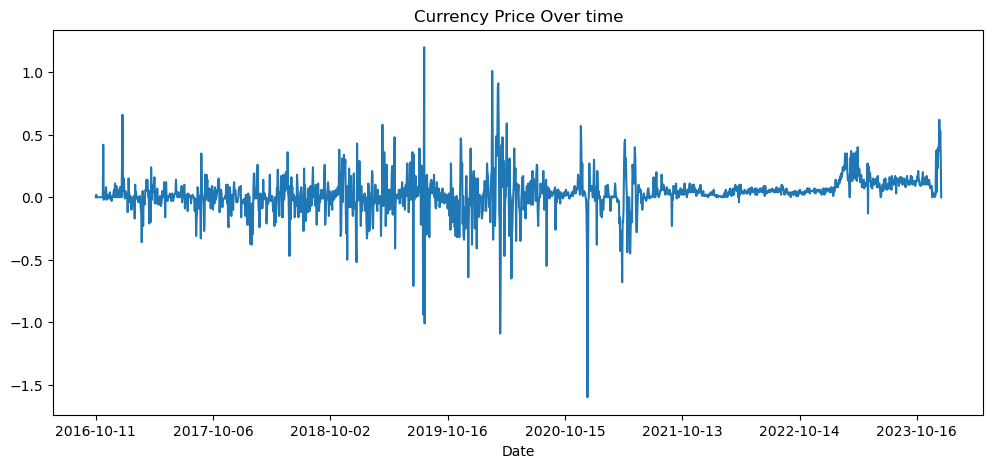

In [25]:
data_diff['diff-value'].plot(title="Currency Price Over time", figsize=(12,5))

In [29]:
data_diff = data_diff['diff-value']

In [31]:
#train test split

train_size = int(len(data_diff)*0.8)
train, test = data_diff[:train_size], data_diff[train_size:]

In [33]:
train.shape

(1442,)

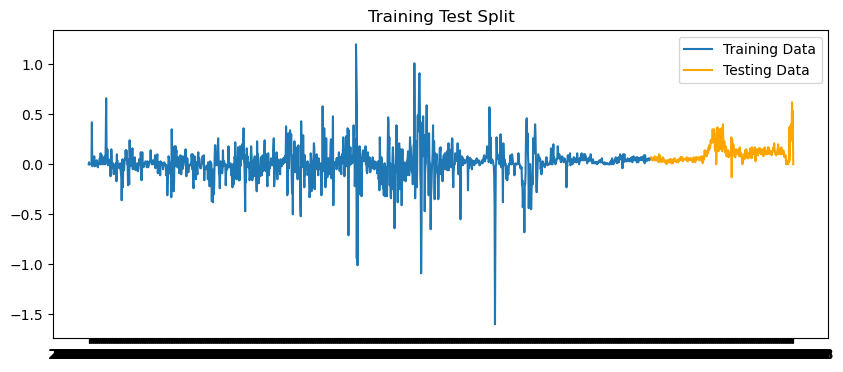

In [39]:
#plotting the split

plt.figure(figsize=(10,4))
plt.plot(train, label="Training Data")
plt.plot(test, label="Testing Data", color="orange")
plt.legend()
plt.title("Training Test Split")
plt.show()

In [41]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_model = model.fit()

print(sarima_model.summary())

C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         diff-value   No. Observations:                 1442
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 644.534
Date:                            Thu, 23 Jan 2025   AIC                          -1279.069
Time:                                    10:50:32   BIC                          -1252.745
Sample:                                         0   HQIC                         -1269.239
                                           - 1442                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3144      0.011     29.420      0.000       0.293       0.335
ma.L1         -0.9996      0.028   

C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


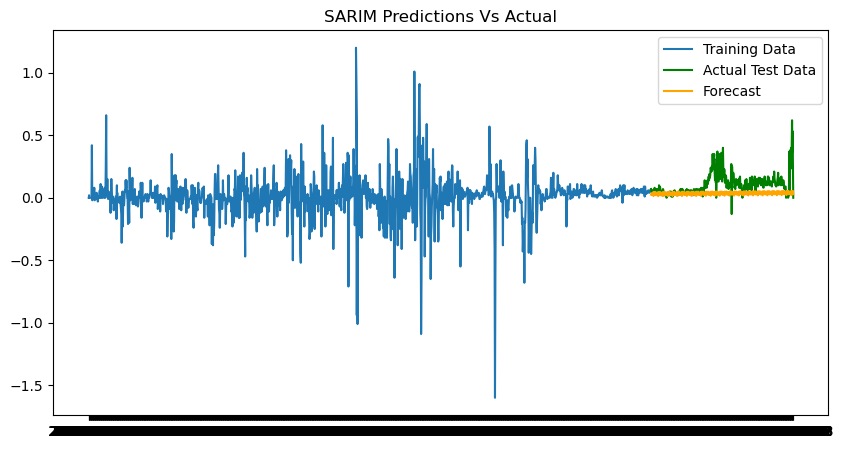

In [43]:
forecast = sarima_model.forecast(steps=len(test))

plt.figure(figsize=(10,5))
plt.plot(train, label="Training Data")
plt.plot(test, label = "Actual Test Data", color='green')
plt.plot(test.index, forecast, label="Forecast", color='orange')
plt.legend()
plt.title('SARIM Predictions Vs Actual')
plt.show()

#### Training using Autofit Model

In [50]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install pmdarima

In [56]:
data_diff

Date
2016-10-11    0.00
2016-10-13    0.02
2016-10-13    0.00
2016-10-13    0.00
2016-10-13    0.00
              ... 
2023-12-28    0.62
2023-12-29    0.37
2024-01-02    0.53
2024-01-02    0.33
2024-01-03    0.00
Name: diff-value, Length: 1803, dtype: float64

In [66]:
fit = auto_arima(data_diff['Mean-value'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-2004.105, Time=2.21 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1290.926, Time=0.20 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1519.888, Time=0.27 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1833.156, Time=0.42 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-2003.931, Time=1.30 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-2003.803, Time=1.19 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-2011.016, Time=2.94 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-2006.918, Time=1.42 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=-2003.422, Time=4.22 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-2012.097, Time=3.21 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-2007.446, Time=3.35 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=-2013.210, Time=3.82 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=-2016.041, Time=4.22 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=-2020.998, Time=4.63 sec
 ARIMA(5,2,1)(0,0,0

In [68]:
fit .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1803
Model:               SARIMAX(5, 2, 2)   Log Likelihood                1018.499
Date:                Thu, 23 Jan 2025   AIC                          -2020.998
Time:                        11:53:17   BIC                          -1977.029
Sample:                             0   HQIC                         -2004.767
                               - 1803                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5883      0.060     -9.746      0.000      -0.707      -0.470
ar.L2          0.2823      0.025     11.433      0.000       0.234       0.331
ar.L3          0.0630      0.014      4.577      0.000       0.036       0.090
ar.L4         -0.0176      0.017     -1.053      0.292      -0.050       0.015
ar.L5         -0.1082      0.016     -6.579      0.000      -0.140      -0.076
ma.L1         -0.0709      0.061     -1.163      0.245      -0.190       0.049
ma.L2         -0.8967      0.061    -14.762      0.000      -1.016      -0.778
sigma2         0.0189      0.000     89.756      0.000       0.018       0.019
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             44157.78
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            -1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Training the model

In [71]:
from statsmodels.tsa.arima.model import ARIMA

In [87]:
data_diff2 = data_diff.drop(columns = ["Time","Currency","Buy","Sell","diff-value"] , axis=1)

In [91]:
data_diff2.head()

,Mean-value
Date,
2016-10-11,101.28
2016-10-13,101.30
2016-10-13,101.30
2016-10-13,101.30
2016-10-13,101.30


In [95]:
#split the data

print(data_diff2.shape)
train = data_diff2.iloc[:-250]
test = data_diff2.iloc[-250:]
print(train.shape, test.shape)

(1803, 1)
(1553, 1) (250, 1)


In [97]:
#Train the model
model = ARIMA(train['Mean-value'], order=(5,2,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Mean-value   No. Observations:                 1553
Model:                 ARIMA(5, 2, 2)   Log Likelihood                 802.979
Date:                Thu, 23 Jan 2025   AIC                          -1589.958
Time:                        12:07:42   BIC                          -1547.185
Sample:                             0   HQIC                         -1574.050
                               - 1553                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6083      0.052    -11.753      0.000      -0.710      -0.507
ar.L2          0.2744      0.021     12.861      0.000       0.233       0.316
ar.L3          0.0597      0.015      3.886      0.000       0.030       0.090
ar.L4         -0.0244      0.017     -1.414      0.157      -0.058       0.009
ar.L5         -0.1192      0.018     -6.720      0.000      -0.154      -0.084
ma.L1         -0.0699      0.052     -1.357      0.175      -0.171       0.031
ma.L2         -0.9218      0.052    -17.863      0.000      -1.023      -0.821
sigma2         0.0207      0.000     74.541      0.000       0.020       0.021
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             31374.14
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -1.09
Prob(H) (two-sided):                  0.31   Kurtosis:                        24.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end)
pred.index=data_diff2.index[start:end+1]
print(pred)

Date
2023-01-04    123.460209
2023-01-05    123.494033
2023-01-06    123.528001
2023-01-09    123.562875
2023-01-10    123.595902
                 ...    
2023-12-28    132.068569
2023-12-29    132.103723
2024-01-02    132.138878
2024-01-02    132.174033
2024-01-03    132.209188
Name: predicted_mean, Length: 250, dtype: float64


<Axes: xlabel='Date'>

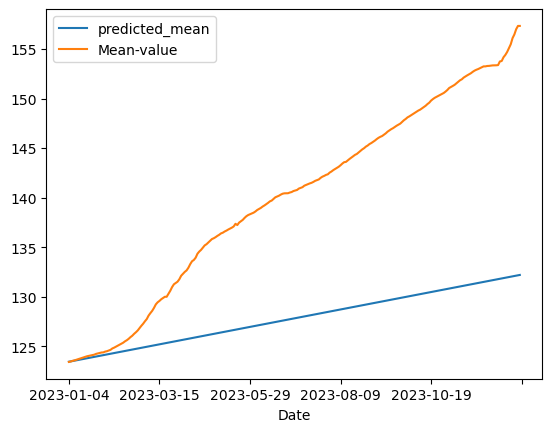

In [107]:
pred.plot(legend=True)
test['Mean-value'].plot(legend=True)

In [109]:
test

,Mean-value
Date,
2023-01-04,123.44
2023-01-05,123.48
2023-01-06,123.55
2023-01-09,123.59
2023-01-10,123.65
...,...
2023-12-28,156.09
2023-12-29,156.46
2024-01-02,156.99


In [111]:
comp_data = test

In [117]:
comp_data

,Mean-value,pred
Date,,
2023-01-04,123.44,123.460209
2023-01-05,123.48,123.494033
2023-01-06,123.55,123.528001
2023-01-09,123.59,123.562875
2023-01-10,123.65,123.595902
...,...,...
2023-12-28,156.09,132.068569
2023-12-29,156.46,132.103723
2024-01-02,156.99,132.138878


In [115]:
comp_data['pred'] = pred

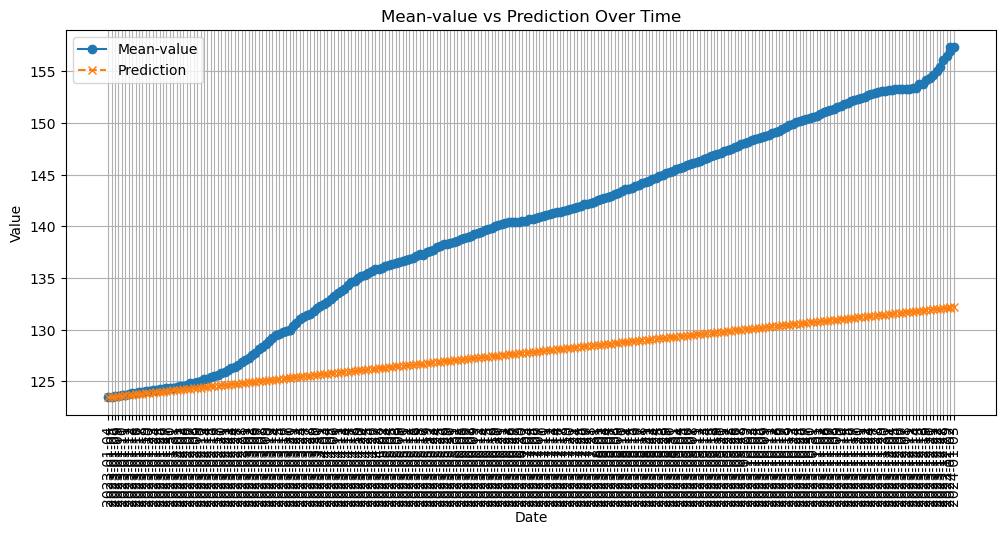

In [123]:
plt.figure(figsize=(12, 5))
plt.plot(comp_data.index, comp_data['Mean-value'], label='Mean-value', marker='o')
plt.plot(comp_data.index, comp_data['pred'], label='Prediction', linestyle='--', marker='x')

# Add labels, title, and legend
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean-value vs Prediction Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()